In [2]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset (1).csv


**Problem Statement 02**

Create an “Academic performance” dataset of students and perform the
following operations using Python.

1. Scan all variables for missing values and inconsistencies. If
there are missing values and/or inconsistencies, use any of the
suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use
any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The
purpose of this transformation should be one of the following
reasons: to change the scale for better understanding of the
variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a
normal distribution.
Reason and document your approach properly.

**1. Import Libraries**

In [83]:
import pandas as pd
import seaborn as sns
import numpy as np

**2. Loading dataframe**

In [84]:
df=pd.read_csv("dataset.csv")

**3. Descriptive Analysis**

In [85]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [87]:
print(df.shape)

(1000, 8)


In [88]:
df.rename(columns={"race/ethnicity":"race", "parental level of education":"parental education", "test preparation course":"preparation"}, inplace=True)
df.rename(columns={"math score":"math", "reading score":"reading", "writing score":"writing" }, inplace=True)
df.head()

,gender,race,parental education,lunch,preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [89]:
df.isnull().sum()

,0
gender,0
race,0
parental education,0
lunch,0
preparation,0
math,0
reading,0
writing,0


**BOXPLOT**

- **Boxplot** is used to visually display the distribution of data and highlight key statistical features.

- **Interquartile Range (IQR)**:
  - The **box** in the plot represents the **middle 50%** of the data (from **Q1** to **Q3**).
  - The **IQR** is the distance between the **first quartile (Q1)** and the **third quartile (Q3)**.

- **Quartiles**:
  - **Q1 (First Quartile)**: The value below which 25% of the data points fall (bottom of the box).
  - **Q2 (Median)**: The middle value, dividing the data into two equal halves (line inside the box).
  - **Q3 (Third Quartile)**: The value below which 75% of the data points fall (top of the box).

- **Outliers**:
  - Points outside the whiskers (or beyond 1.5 * IQR) are considered **outliers**.
  - These are marked as **individual points** beyond the whiskers.

- **Purpose**:
  - **IQR and quartiles** help you understand data spread and central tendency.
  - **Outliers** identify extreme data points that may need further investigation or transformation.

<Axes: >

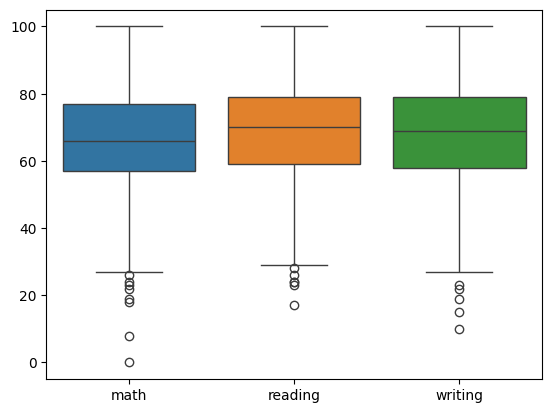

In [90]:
#Boxplot
sns.boxplot(df)

<Axes: >

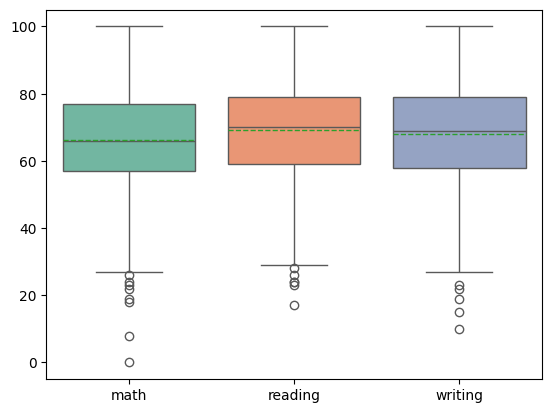

In [91]:
#Showing mean
sns.boxplot(df, showmeans=True, meanline=True, palette="Set2")

In [92]:
def describe_boxplot_data(df):
    for col in df.columns:
      if(df[col].dtype=="int"):
        data = df[col]

        # Calculate quartiles
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].quantile(0.5)  # Median
        Q3 = df[col].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Calculate whiskers (1.5 * IQR rule)
        whisker_lower = Q1 - 1.5 * IQR
        whisker_upper = Q3 + 1.5 * IQR

        # Find outliers
        outliers = [x for x in data if x < whisker_lower or x > whisker_upper]

        # Calculate mean
        mean = np.mean(data)

        # Print values for each column
        print(f"Column: {col.capitalize()}")
        print(f"  Q1 (First Quartile): {Q1}")
        print(f"  Median (Q2): {Q2}")
        print(f"  Q3 (Third Quartile): {Q3}")
        print(f"  IQR: {IQR}")
        print(f"  Lower Whisker: {whisker_lower}")
        print(f"  Upper Whisker: {whisker_upper}")
        print(f"  Outliers: {outliers}")
        print(f"  Mean: {mean}")
        print("\n")

# Call the function to display the summary
describe_boxplot_data(df)



Column: Math
  Q1 (First Quartile): 57.0
  Median (Q2): 66.0
  Q3 (Third Quartile): 77.0
  IQR: 20.0
  Lower Whisker: 27.0
  Upper Whisker: 107.0
  Outliers: [18, 0, 22, 24, 26, 19, 23, 8]
  Mean: 66.089


Column: Reading
  Q1 (First Quartile): 59.0
  Median (Q2): 70.0
  Q3 (Third Quartile): 79.0
  IQR: 20.0
  Lower Whisker: 29.0
  Upper Whisker: 109.0
  Outliers: [17, 26, 28, 23, 24, 24]
  Mean: 69.169


Column: Writing
  Q1 (First Quartile): 57.75
  Median (Q2): 69.0
  Q3 (Third Quartile): 79.0
  IQR: 21.25
  Lower Whisker: 25.875
  Upper Whisker: 110.875
  Outliers: [10, 22, 19, 15, 23]
  Mean: 68.054




**4. Removing Outliers Using Zscore**

<Axes: >

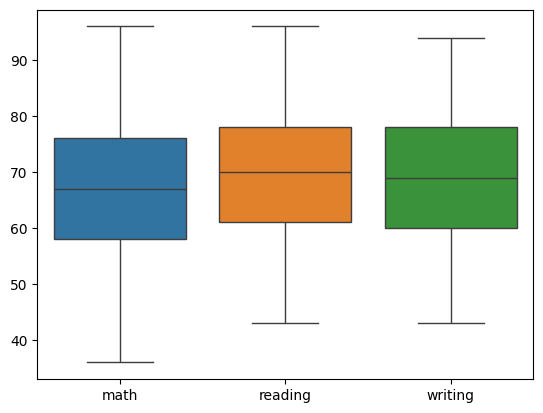

In [52]:
from scipy.stats import zscore

def remove_outliers_zscore(df):
    for col in df.columns:
        if df[col].dtype == "int":  # Only check numeric columns
            # Calculate Z-scores
            z_scores = zscore(df[col])

            # Define a threshold for outliers (e.g., Z-score > 3)
            threshold = 2

            # Remove rows where Z-score is greater than the threshold (outliers)
            df = df[(z_scores < threshold) & (z_scores > -threshold)]
    return df

# Apply the function to remove outliers using Z-scores
df_cleaned = remove_outliers_zscore(df)
sns.boxplot(df_cleaned)

**5. Removing Outliers Using IQR**

<Axes: >

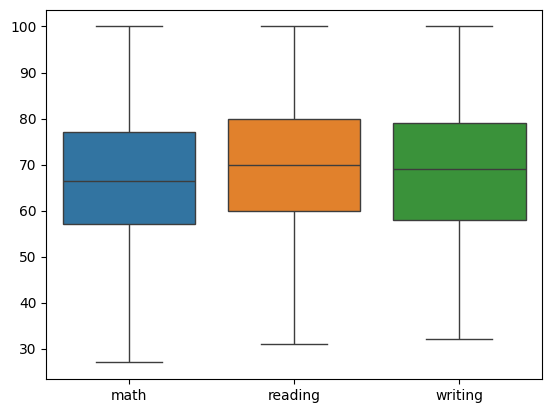

In [58]:
def remove_outliers_iqr(df):
    for col in df.columns:
        if df[col].dtype == "int":  # Only check numeric columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            whisker_lower = Q1 - 1.5 * IQR
            whisker_upper = Q3 + 1.5 * IQR

            # Remove rows with outliers
            df = df[(df[col] >= whisker_lower) & (df[col] <= whisker_upper)]
    return df

# Apply the function to remove outliers using IQR
df= remove_outliers_iqr(df)

sns.boxplot(df)

**6. MinMax Scaling**

In [77]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply the MinMaxScaler to Math, Reading, and Writing columns
df[['math', 'reading', 'writing']] = min_max_scaler.fit_transform(df[['math', 'reading', 'writing']])

# Check the transformed data
print(df.iloc[:,5:8])


         math   reading   writing
0    0.616438  0.594203  0.617647
1    0.575342  0.855072  0.823529
2    0.863014  0.927536  0.897059
3    0.273973  0.376812  0.176471
4    0.671233  0.681159  0.632353
..        ...       ...       ...
995  0.835616  0.985507  0.926471
996  0.479452  0.347826  0.338235
997  0.438356  0.579710  0.485294
998  0.561644  0.681159  0.661765
999  0.684932  0.797101  0.794118

[986 rows x 3 columns]


**7. Standard Scaling**

In [78]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply the StandardScaler to Math, Reading, and Writing columns
df[['math', 'reading', 'writing']] = standard_scaler.fit_transform(df[['math', 'reading', 'writing']])

# Check the transformed data
print(df.iloc[:,5:8])


         math   reading   writing
0    0.370131  0.163761  0.371152
1    0.160831  1.458384  1.342041
2    1.625930  1.818002  1.688787
3   -1.374034 -0.915092 -1.709324
4    0.649197  0.595302  0.440501
..        ...       ...       ...
995  1.486397  2.105696  1.827485
996 -0.327535 -1.058939 -0.946483
997 -0.536835  0.091837 -0.252991
998  0.091065  0.595302  0.579200
999  0.718964  1.170690  1.203342

[986 rows x 3 columns]


**8. Robust Scaling**

In [73]:
from sklearn.preprocessing import RobustScaler

# Instantiate the RobustScaler
scaler = RobustScaler()

# Apply it to the Math, Reading, and Writing columns
df[['math', 'reading', 'writing']] = scaler.fit_transform(df[['math', 'reading', 'writing']])

print(df.iloc[:,5:8])


      math  reading   writing
0    0.275     0.10  0.238095
1    0.125     1.00  0.904762
2    1.175     1.25  1.142857
3   -0.975    -0.65 -1.190476
4    0.475     0.40  0.285714
..     ...      ...       ...
995  1.075     1.45  1.238095
996 -0.225    -0.75 -0.666667
997 -0.375     0.05 -0.190476
998  0.075     0.40  0.380952
999  0.525     0.80  0.809524

[986 rows x 3 columns]
